In [29]:
import matplotlib.pyplot as plt
import xarray as xr

In [30]:
data = xr.open_dataset("simulation_output.nc")

In [31]:
data

<xarray.Dataset> Size: 3MB
Dimensions:          (subpop: 581, date: 122, infection_stage: 3)
Coordinates:
  * subpop           (subpop) object 5kB '11001' '11002' ... '93088' '93090'
  * date             (date) datetime64[ns] 976B 2024-01-01 ... 2024-05-01
  * infection_stage  (infection_stage) object 24B 'S' 'I' 'R'
Data variables:
    prevalence       (date, infection_stage, subpop) float64 2MB ...
    incidence        (date, infection_stage, subpop) float64 2MB ...
Attributes:
    description:  Dynamical simulation results
    run_id:       20240719_103326

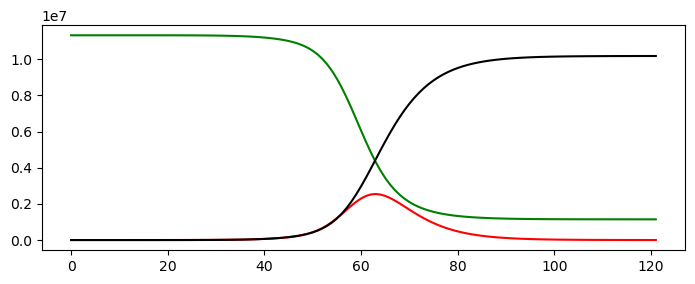

In [33]:
S0 = data.sel({'infection_stage': 'S'}).sum(dim='subpop')['prevalence'].isel(date=0).values
time = range(len(data['date']))

fig,ax = plt.subplots(figsize=(8.3,11.7/4))
ax.plot(time, data.sel({'infection_stage': 'S'}).sum(dim='subpop')['prevalence'], color='green')
ax.plot(time, data.sel({'infection_stage': 'I'}).sum(dim='subpop')['prevalence'], color='red')
ax.plot(time, data.sel({'infection_stage': 'R'}).sum(dim='subpop')['prevalence'], color='black')
plt.savefig('flepimop_wo_age.png',dpi=200)
plt.show()
plt.close()